<a href="https://colab.research.google.com/github/rishisai0811/NLP_ASSIGNMENT/blob/main/ecommerce_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import dependencies

In [10]:
import tensorflow as tf
import pandas as pd
import string
import nltk
nltk.download()
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


# Exploratory Data Analysis (EDA)

In [3]:
df = pd.read_csv('ecommerceDataset.csv')
df.columns = ['label', 'text']
df.head()

,label,text
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50424 entries, 0 to 50423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   50424 non-null  object
 1   text    50423 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


# Data Preprocessing

In [5]:
category = pd.get_dummies(df.label)
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='label')
new_df

,text,Books,Clothing & Accessories,Electronics,Household
0,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",0,0,0,1
1,SAF 'UV Textured Modern Art Print Framed' Pain...,0,0,0,1
2,"SAF Flower Print Framed Painting (Synthetic, 1...",0,0,0,1
3,Incredible Gifts India Wooden Happy Birthday U...,0,0,0,1
4,Pitaara Box Romantic Venice Canvas Painting 6m...,0,0,0,1
...,...,...,...,...,...
50419,Strontium MicroSD Class 10 8GB Memory Card (Bl...,0,0,1,0
50420,CrossBeats Wave Waterproof Bluetooth Wireless ...,0,0,1,0
50421,Karbonn Titanium Wind W4 (White) Karbonn Titan...,0,0,1,0
50422,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou...",0,0,1,0


In [6]:
text_categories = new_df['text'].values
label = new_df[['Books', 'Clothing & Accessories', 'Electronics', 'Household']].values

In [7]:
text_categories[:3]

array(["SAF 'Floral' Framed Painting (Wood, 30 inch x 10 inch, Special Effect UV Print Textured, SAO297) Painting made up in synthetic frame with UV textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch (A perfect gift for your special ones).",
       "SAF 'UV Textured Modern Art Print Framed' Painting (Synthetic, 35 cm x 50 cm x 3 cm, Set of 3) Color:Multicolor                                                                                \xa0|\xa0                           Size:35 cm x 50 cm x 3 cm   Overview a beautiful painting involves the action or skill of using paint in the right manner; hence, the end product will be a picture that can speak a thousand words they say. Arts have been in trend for quite some time now. It can give different viewer different meanings style and design the SAF wood matte abstract painting with frame is quite abstract and mysteriously beaut

In [11]:
stop_words = set(stopwords.words('english'))

def remove_stopwords_and_punctuation(text):
    # tokenize the words
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    new_words = tokenizer.tokenize(str(text))

    # remove stop words and punctuation
    filtered_sentence = [w.lower() for w in new_words if w.lower() not in stop_words and w.lower() not in string.punctuation]

    # Recombine the filtered words
    cleaned_text = ' '.join(filtered_sentence)

    return cleaned_text

cleaned_texts = [remove_stopwords_and_punctuation(text) for text in text_categories]

In [12]:
cleaned_texts[:5]

['saf floral framed painting wood 30 inch x 10 inch special effect uv print textured sao297 painting made synthetic frame uv textured print gives multi effects attracts towards special series paintings makes wall beautiful gives royal touch perfect gift special ones',
 'saf uv textured modern art print framed painting synthetic 35 cm x 50 cm x 3 cm set 3 color multicolor size 35 cm x 50 cm x 3 cm overview beautiful painting involves action skill using paint right manner hence end product picture speak thousand words say arts trend quite time give different viewer different meanings style design saf wood matte abstract painting frame quite abstract mysteriously beautiful painting nice frame gift family friend painting various forms certain figures seen image add good set lights place painting decor give different feel look place quality durability painting matte finish includes good quality frame last long period however include glass along frame specifications purchase saf wood matte a

In [13]:
text_train, text_test, label_train, label_test = train_test_split(cleaned_texts,
                                                                  label,
                                                                  test_size=0.2,
                                                                  random_state=45)

In [14]:
# Hyperparameters
vocab_size = 10000
max_length = 1000
oov = 'x'
padding = 'post'
truncating = 'post'

In [15]:
# Tokenizer and create padding sequences
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov)
tokenizer.fit_on_texts(text_train)
tokenizer.fit_on_texts(text_test)

sequences_train = tokenizer.texts_to_sequences(text_train)
sequences_test = tokenizer.texts_to_sequences(text_test)

padded_train = pad_sequences(sequences_train, padding=padding, maxlen=max_length, truncating=truncating)
padded_test = pad_sequences(sequences_test, padding=padding, maxlen=max_length, truncating=truncating)

In [16]:
print(f"Shape of training padded: {padded_train.shape}")
print(f"Shape of testing padded: {padded_test.shape}")

Shape of training padded: (40339, 1000)
Shape of testing padded: (10085, 1000)


# Prepare and create a Model

In [17]:
# callback function
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.9):
      print("\naccuracy is greater than 90%, process stoped.")
      self.model.stop_training = True

callbacks = myCallback()

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=32),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 bidirectional (Bidirection  (None, 32)                6272      
 al)                                                             
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
Total params: 328644 (1.25 MB)
Trainable params: 328644 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
num_epochs = 10
batch_size = 128
history = model.fit(padded_train, label_train, epochs=num_epochs, batch_size=batch_size,
                    validation_data=(padded_test, label_test), verbose=1, callbacks=[callbacks])

Epoch 1/10
316/316 [==============================] - 339s 1s/step - loss: 0.5069 - accuracy: 0.8159 - val_loss: 0.1466 - val_accuracy: 0.9628
Epoch 2/10
316/316 [==============================] - ETA: 0s - loss: 0.1170 - accuracy: 0.9733
accuracy is greater than 90%, process stoped.
316/316 [==============================] - 337s 1s/step - loss: 0.1170 - accuracy: 0.9733 - val_loss: 0.1081 - val_accuracy: 0.9731


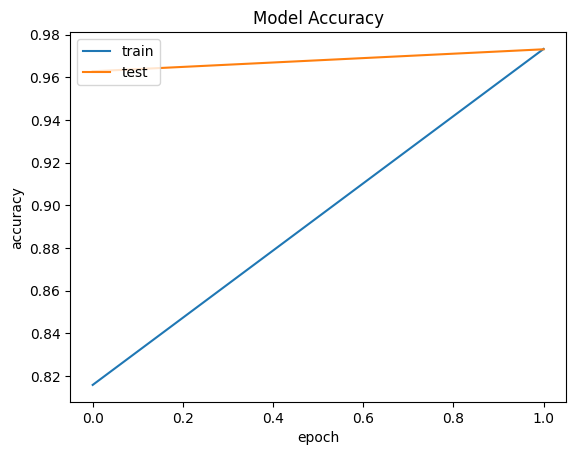

In [22]:
# accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

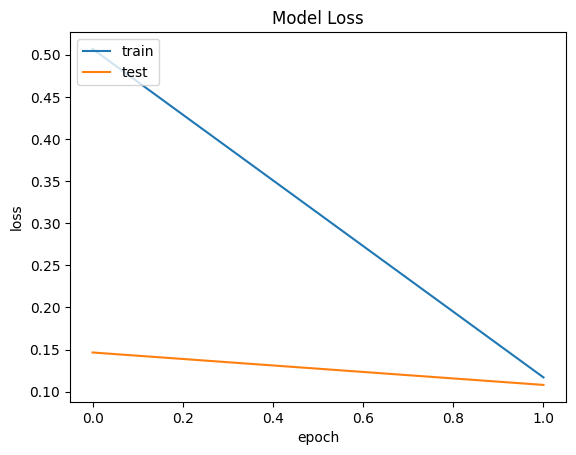

In [23]:
# loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()